In [ ]:
# default_exp network

# network

> Module implementing multiple dense neural network architecture.

In [ ]:
#hide
from nbdev.showdoc import *


We can now define different neural network architecture to learn a regression problem on the ishigami function.

We will create neural network from different size to make a selection. 

To access the quality of the prediction, we'll use the classic Mean Squared Error : 

$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y}_i)$$

where $y_i$ and $\bar{y}_i$ are respectively the target value and the predicted value.

In [ ]:
#export
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
#export
def small_dnn(input_shape, 
              output_shape,
              summary = False):
    """ Creates a small dense neural network 
        Arguments :
            input_shape : integer, the dimension of the input space
            output_shape : interger, the dimension of the output space
            summary = False : boolean to show the internal architecture of the neural network
        Output :
            Return the dense neural network ready to fit
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12,activation=tf.nn.tanh,input_shape=(input_shape,)),
        tf.keras.layers.Dense(output_shape)
    ])
    model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mean_squared_error'])
    if summary is True :
        print('Architecture of the Dense Neural Network : \n {}'.format(model.summary()))
    return model

In [ ]:
#export
def intermediate1_dnn(input_shape,
                      output_shape,
                      summary = False):
    """ Creates a intermediate dense neural network 
        Arguments :                                                                                           
            input_shape : integer, the dimension of the input space                             
            output_shape : interger, the dimension of the output space
            summary = False : boolean to show the internal architecture of the neural network
        Output :                                                                                       
            Return the dense neural network ready to fit  
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(30,activation=tf.nn.relu,input_shape=(input_shape,)),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(20,activation=tf.nn.relu,input_shape=(30,)),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation=tf.nn.relu,input_shape=(20,)),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(output_shape)
        ])

    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
    if summary is True :
        print('Architecture of the Dense Neural Network : \n {}'.format(model.summary()))
    return model

In [ ]:
#export
def intermediate2_dnn(input_shape,
                      output_shape,
                      summary = False):
    """ Creates a intermediate dense neural network 
        Arguments :                                                                                           
            input_shape : integer, the dimension of the input space                             
            output_shape : interger, the dimension of the output space
            summary = False : boolean to show the internal architecture of the neural network
        Output :                                                                                      
            Return the dense neural network ready to fit  
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(70,activation=tf.nn.relu,input_shape=(100,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(40,activation=tf.nn.relu,input_shape=(70,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation=tf.nn.relu,input_shape=(40,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(output_shape)
        ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
    if summary is True :
        print('Architecture of the Dense Neural Network : \n {}'.format(model.summary()))
    return model

In [ ]:
#export
def big_dnn(input_shape,
            output_shape,
            summary = False):
    """ Creates a intermediate dense neural network 
            Arguments :                                                                                           
                input_shape : integer, the dimension of the input space                             
                output_shape : interger, the dimension of the output space
                summary = False : boolean to show the internal architecture of the neural network
            Output :                                                                                      
                Return the dense neural network ready to fit  
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(300,activation=tf.nn.relu,input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(200,activation=tf.nn.relu,input_shape=(300,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(200,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(50,activation=tf.nn.relu,input_shape=(100,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation=tf.nn.relu,input_shape=(50,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(output_shape)
        ])

    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
    if summary is True :
        print('Architecture of the Dense Neural Network : \n {}'.format(model.summary()))
    return model

In [ ]:
#export
def huge_dnn(input_shape,
             output_shape,
             summary = False):
    """ Creates a huge dense neural network 
            Arguments :                                                                                           
                input_shape : integer, the dimension of the input space                             
                output_shape : interger, the dimension of the output space
                summary = False : boolean to show the internal architecture of the neural network
            Output :                                                                                      
                Return the dense neural network ready to fit  
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(600,activation=tf.nn.relu,input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300,activation=tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(150,activation=tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(75,activation=tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(50,activation=tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(output_shape)
    ])

    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
    if summary is True :
        print('Architecture of the Dense Neural Network : \n {}'.format(model.summary()))
    return model


We can test one of these architecture on our Ishigami function.

In [ ]:
from PESmetamodel.dataset import open_data, create_train_test_set, norm
database = open_data('data/ishigami.csv',info=True)
train_features, train_labels, test_features, test_labels = create_train_test_set(database,1.,.0,'y')
normed_train_features, normed_test_features = norm(train_features), norm(test_features)

Five first rows of the generated DataFrame : 
      x1    x2    x3         y
0 -0.26 -0.47  1.33 -3.507725
1  1.12 -2.40  0.16 -3.828083
2 -2.00 -1.37 -0.65 -7.784885
3 -1.84 -1.77 -0.94 -7.900817
4  2.21  0.09  0.66  1.446949

DataFrame shape : (500, 4)



We define the network. Here a small one must be sufficient.

In [ ]:
net = small_dnn(3, 1, summary = True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 12)                48        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 13        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Architecture of the Dense Neural Network : 
 None


And we start training.

In [ ]:
histories = net.fit(normed_train_features, train_labels, batch_size = 128, epochs=3000,
                    validation_split=0.2,verbose = 0)


In [ ]:
hist = pd.DataFrame(histories.history)
hist['epoch'] = histories.epoch
hist.tail()


,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
2995,0.767214,0.767214,1.485304,1.485304,2995
2996,0.913394,0.913394,0.849486,0.849486,2996
2997,0.815465,0.815465,0.901018,0.901018,2997
2998,0.796490,0.796489,0.746018,0.746018,2998
2999,0.766655,0.766655,0.720991,0.720991,2999


This function release a plot showing how the network learned.

In [ ]:
#export
def plot_learning(histories,
                 top,
                 save = False,
                 save_name = None,
                 key='loss'):
    """ Plot the evolution of the loss function for the range 0 to 20
        Arguments : 
            histories : list, the output given by the function model.fit
            save = 'False' : indicates to save the plot in a file
            save_name = 'None' : string, file name where to save the plot, should be a png
            key = 'loss' : indicate to plot the loss function could also take the value 'mean_absolute_error'
        Output : 
            Creates a png file
    """
    plt.figure(figsize=(12,8))
    
    history_dict = histories.history
    history_dict.keys()

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'ro', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    if save:
        plt.savefig(save_name)
    else:
        plt.show()

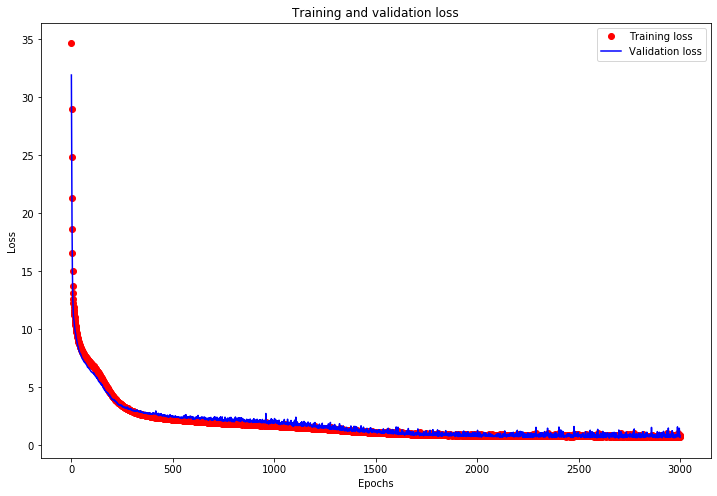

In [ ]:
plot_learning(histories,20)

In [ ]:
#export
def plot_history(histories,
		 save_name,
		 key='loss'):
	""" Plot the evolution of the loss function for the range 0 to 20
		Arguments : 
			histories : list, the output given by the function model.fit
			save_name : string, file name where to save the plot, should be a png
			key = 'loss' : indicate to plot the loss function could also take the value 'mean_absolute_error'
		Output : 
			Creates a png file
	"""
	plt.figure(figsize=(12,8))

	for name, history in histories:
		val = plt.plot(history.epoch,history.history['val_'+key],'--', label=name.title()+' Val')
		plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label=name.title()+' Train')

	plt.xlabel('Epochs')
	plt.ylabel(key.replace('_',' ').title())
	plt.legend()
	plt.title("Courbe d'apprentissage pour les 5 architectures differentes")
	plt.ylim([0,20])
	plt.savefig(save_name)

In [ ]:
#export
def compare_dnn(input_shape ,
                output_shape,
                train_features,
                train_labels,
                test_features,
                test_labels,
                summary = False):
    """ Compare the performance of all five 5 pre-made dnn architecture and plot their loss 
        Arguments :
            input_shape : integer, the dimension of the input space                             
            output_shape : interger, the dimension of the output space
            train_features : DataFrame 
            train_labels : DataFrame
            test_features : DataFrame
            test_labels : DataFrame
            summary = False : boolean to show the internal architecture of the neural network
        Output:
            A file plot. 
    """
    model1 = small_dnn(3,1,summary)
    model2 = intermediate1_dnn(3,1,summary)
    model3 = intermediate2_dnn(3,1,summary)
    model4 = big_dnn(3,1,summary)
    model5 = huge_dnn(3,1,summary)
    
    EPOCHS = 2000
    batch_size = 128
    histories1 = model1.fit(train_features, train_labels, batch_size = batch_size, epochs=EPOCHS,validation_split = 0.2,verbose = 0)
    histories2 = model2.fit(train_features, train_labels, batch_size = batch_size, epochs=EPOCHS,validation_split = 0.2,verbose = 0)
    histories3 = model3.fit(train_features, train_labels, batch_size = batch_size, epochs=EPOCHS,validation_split = 0.2,verbose = 0)
    histories4 = model4.fit(train_features, train_labels, batch_size = batch_size, epochs=EPOCHS,validation_split = 0.2,verbose = 0)
    histories5 = model5.fit(train_features, train_labels, batch_size = batch_size, epochs=EPOCHS,validation_split = 0.2,verbose = 0)
    
    plot_history([('small',histories1),('intermediate1',histories2),('intermediate2',histories3),('big',histories4),('huge',histories5)],'comparaison_')


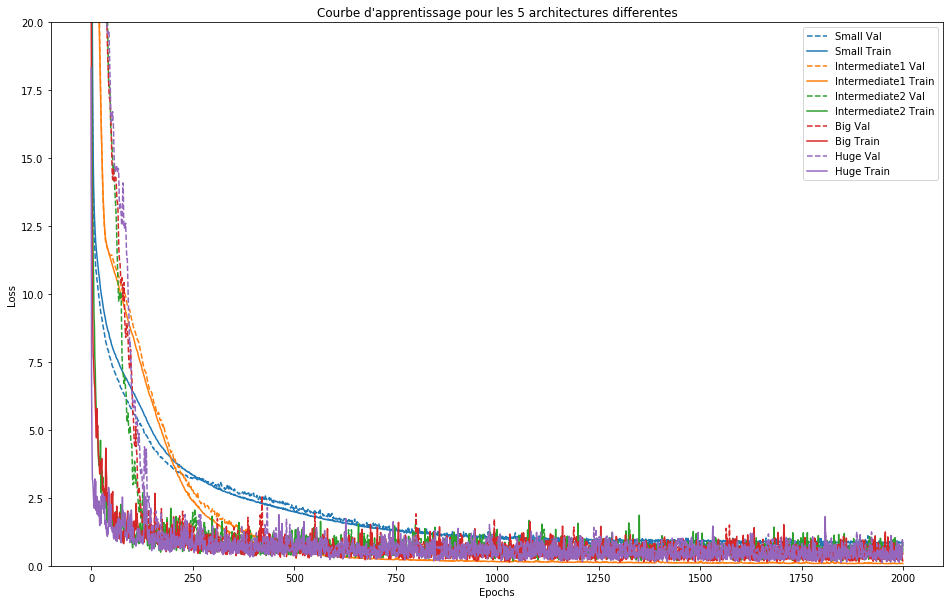

In [ ]:
compare_dnn(3,1,normed_train_features,train_labels,normed_test_features,test_labels)